In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv("sample_data/final_dataset.csv")
type(data)
data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.00,322.00,0.00,2.00,109.00,0.00,2.40,2.00,3.00,3.00,2.0
1,67.0,0.0,3.0,115.00,564.00,0.00,2.00,160.00,0.00,1.60,2.00,0.00,7.00,1.0
2,57.0,1.0,2.0,124.00,261.00,0.00,0.00,141.00,0.00,0.30,1.00,0.00,7.00,2.0
3,64.0,1.0,4.0,128.00,263.00,0.00,0.00,105.00,1.00,0.20,2.00,1.00,7.00,1.0
4,74.0,0.0,2.0,120.00,269.00,0.00,2.00,121.00,1.00,0.20,1.00,1.00,3.00,1.0


In [78]:
data.describe()
data.info()
k=list(map(float,input().split()))

data.append(k)
f=len(data)-1
for i in range(len(data['presence'])):
    if data['presence'][i]==float(1) or data['presence'][i]==float(2) or data['presence'][i]==float(3) or data['presence'][i]==float(4):
        data['presence'][i]=float(1)
print(data['presence'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  presence  920 non-null    float64
dtypes: float64(4), object(10)
memory usage: 100.8+ KB
74.0	0.0	2.0	120.00	269.00	0.00	2.00	121.00	1.00	0.20	1.00	1.00	3.00	1.0
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
915    1.0
916    0.0
917    1.0
918    0.0
919    1.0
Name: presence, Length

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [79]:
for i in data:
    data[i]=data[i].replace("?",np.nan)
    data[i]=data[i].astype(float)
    data[i] = data[i].fillna(data[i].median())
   
    #data[i]=data[i].replace("?",data[i].mean())
    print(data[i])

0      70.0
1      67.0
2      57.0
3      64.0
4      74.0
       ... 
915    54.0
916    62.0
917    55.0
918    58.0
919    62.0
Name: age, Length: 920, dtype: float64
0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
915    0.0
916    1.0
917    1.0
918    1.0
919    1.0
Name: sex, Length: 920, dtype: float64
0      4.0
1      3.0
2      2.0
3      4.0
4      2.0
      ... 
915    4.0
916    1.0
917    4.0
918    4.0
919    2.0
Name: cp, Length: 920, dtype: float64
0      130.0
1      115.0
2      124.0
3      128.0
4      120.0
       ...  
915    127.0
916    130.0
917    122.0
918    130.0
919    120.0
Name: trestbps, Length: 920, dtype: float64
0      322.0
1      564.0
2      261.0
3      263.0
4      269.0
       ...  
915    333.0
916    139.0
917    223.0
918    385.0
919    254.0
Name: chol, Length: 920, dtype: float64
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
915    1.0
916    0.0
917    1.0
918    1.0
919    0.0
Name: fbs, Length: 

In [80]:
print(data.corr()["presence"].abs().sort_values(ascending=False))
#data=data.corr()["presence"].abs().sort_values(ascending=False)
#data=data[['oldpeak','cp','age','exang','presence']]


presence    1.000000
cp          0.349151
oldpeak     0.319843
exang       0.318324
age         0.275131
ca          0.218111
restecg     0.184064
sex         0.129822
thalach     0.123904
fbs         0.119448
thal        0.117736
chol        0.104025
slope       0.092186
trestbps    0.050402
Name: presence, dtype: float64


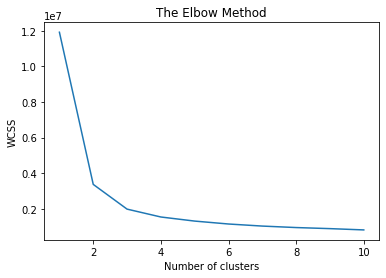

In [81]:
X=data.iloc[:,:13]
y=data.iloc[13]
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

          age       sex         cp  ...      thal   presence  Cluster
0    2.162007 -2.642710  11.346522  ...  4.998603   9.535602        5
1   -3.580491  1.332027   5.876543  ... -4.947442   2.308737        0
2    4.586435 -2.018015  -5.560665  ...  2.204468   2.797254        4
3   -1.841997 -1.768164  -2.852894  ... -8.515467  -9.222275        1
4    2.076692 -2.301873  11.581101  ...  5.649498   8.974561        5
..        ...       ...        ...  ...       ...        ...      ...
915  3.474491 -3.555192   9.007247  ...  6.328860  10.253150        5
916 -4.179978  3.283879   7.520503  ... -4.069164   2.399138        0
917 -3.629434  8.181117  -3.062264  ...  1.118403  -1.104187        6
918  0.692079  2.140143   2.208644  ... -0.918631   2.807247        7
919 -8.274597 -6.162135   0.655023  ... -2.211421  -6.577357        8

[920 rows x 15 columns]
8


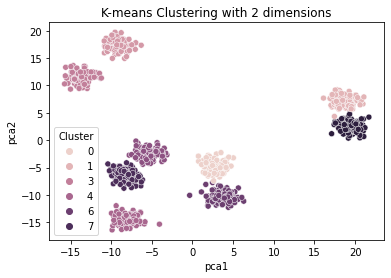

In [86]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

'''kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
print(Y_Kmeans)
# Visualising the clusters
plt.scatter(Y_Kmeans,[0,1])'''
X, _ = make_blobs(n_samples=len(data), centers=9, n_features=14)

df = pd.DataFrame(X, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','presence'])
kmeans = KMeans(n_clusters=9)

y = kmeans.fit_predict(df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','presence']])

df['Cluster'] = y

print(df)
print(df['Cluster'][f])
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [87]:
m=[]
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
for j in range(9):
  p=[]
  for i in range(len(df['Cluster'])):
    if df['Cluster'][i]==j:
      p.append([data['age'][i],data['sex'][i],data['cp'][i],data['trestbps'][i],data['chol'][i],data['fbs'][i],data['restecg'][i],data['thalach'][i],data['exang'][i],data['oldpeak'][i],data['slope'][i],data['ca'][i],data['thal'][i],data['presence'][i]])
  l=pd.DataFrame(p)
  

  predictors = l.drop(13,axis=1)
  target = l[13]

  X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
    #SVM
   

  sv = svm.SVC(kernel='linear')

  sv.fit(X_train, Y_train)

  Y_pred_svm = sv.predict(X_test)
  score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

  print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
  
  
  #KNN
 

  knn = KNeighborsClassifier(n_neighbors=7)
  knn.fit(X_train,Y_train)
  Y_pred_knn=knn.predict(X_test)
  score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

  
  print(classification_report(Y_test,Y_pred_knn))
  

  max_accuracy = 0


  for x in range(200):
      dt = DecisionTreeClassifier(random_state=x)
      dt.fit(X_train,Y_train)
      Y_pred_dt = dt.predict(X_test)
      current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
      if(current_accuracy>max_accuracy):
          max_accuracy = current_accuracy
          best_x = x
          
  #print(max_accuracy)
  #print(best_x)


  dt = DecisionTreeClassifier(random_state=best_x)
  dt.fit(X_train,Y_train)
  Y_pred_dt = dt.predict(X_test)
  score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

  print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
  
  
  lr = LogisticRegression()

  lr.fit(X_train,Y_train)

  Y_pred_lr = lr.predict(X_test)
  score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

  print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
 
  
  

The accuracy score achieved using Linear SVM is: 85.71 %
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.84      0.94      0.89        17

    accuracy                           0.81        21
   macro avg       0.67      0.60      0.61        21
weighted avg       0.78      0.81      0.78        21

The accuracy score achieved using Decision Tree is: 71.43 %
The accuracy score achieved using Logistic Regression is: 85.71 %
The accuracy score achieved using Linear SVM is: 80.95 %
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.65      0.93      0.76        14

    accuracy                           0.62        21
   macro avg       0.33      0.46      0.38        21
weighted avg       0.43      0.62      0.51        21



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Decision Tree is: 76.19 %
The accuracy score achieved using Logistic Regression is: 80.95 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 80.95 %
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.88      0.94      0.91        16

    accuracy                           0.86        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.85      0.86      0.85        21

The accuracy score achieved using Decision Tree is: 90.48 %
The accuracy score achieved using Logistic Regression is: 80.95 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 80.95 %
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.81      1.00      0.89        17

    accuracy                           0.81        21
   macro avg       0.40      0.50      0.45        21
weighted avg       0.66      0.81      0.72        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score achieved using Decision Tree is: 90.48 %
The accuracy score achieved using Logistic Regression is: 85.71 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 66.67 %
              precision    recall  f1-score   support

         0.0       0.22      0.67      0.33         3
         1.0       0.92      0.61      0.73        18

    accuracy                           0.62        21
   macro avg       0.57      0.64      0.53        21
weighted avg       0.82      0.62      0.68        21

The accuracy score achieved using Decision Tree is: 76.19 %
The accuracy score achieved using Logistic Regression is: 71.43 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 76.19 %
              precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       0.72      0.87      0.79        15

    accuracy                           0.67        21
   macro avg       0.53      0.52      0.51        21
weighted avg       0.61      0.67      0.63        21

The accuracy score achieved using Decision Tree is: 80.95 %
The accuracy score achieved using Logistic Regression is: 76.19 %
The accuracy score achieved using Linear SVM is: 71.43 %
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.75      0.94      0.83        16

    accuracy                           0.71        21
   macro avg       0.38      0.47      0.42        21
weighted avg       0.57      0.71      0.63        21



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Decision Tree is: 61.9 %
The accuracy score achieved using Logistic Regression is: 76.19 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 66.67 %
              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40         6
         1.0       0.76      0.87      0.81        15

    accuracy                           0.71        21
   macro avg       0.63      0.60      0.61        21
weighted avg       0.69      0.71      0.69        21

The accuracy score achieved using Decision Tree is: 71.43 %
The accuracy score achieved using Logistic Regression is: 66.67 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy score achieved using Linear SVM is: 80.95 %
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.71      0.59      0.65        17

    accuracy                           0.48        21
   macro avg       0.36      0.29      0.32        21
weighted avg       0.58      0.48      0.52        21

The accuracy score achieved using Decision Tree is: 80.95 %
The accuracy score achieved using Logistic Regression is: 80.95 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,Y_pred_lr)
print(confusion_matrix)


[[ 3  1]
 [ 3 14]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.50      0.75      0.60         4
         1.0       0.93      0.82      0.87        17

    accuracy                           0.81        21
   macro avg       0.72      0.79      0.74        21
weighted avg       0.85      0.81      0.82        21

